# Pokemon Analysis

## Dataset Information
This dataset is about Pokemon which have 800 rows and 13 columns.

The dataset can be accessed at: https://drive.google.com/file/d/1-Sc7_q52hxhKMEe-nyly_HXxbRzPpzWT/view

## Goals
1. Based on generations, what is the total number per generation?
2. What about the number of each type of Pokemon?
3. What Pokemon has the highest and lowest attack value?
4. What about the correlation of each column in the Pokemon dataset?
5. How to predict whether a Pokemon is legendary or not?

## Import Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\miase\AppData\Local\Temp\ipykernel_22448\1539118300.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#loading the dataset
df=pd.read_csv('Pokemon.csv')
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
# Find the detail information of dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
# Find the shape of the dataset
df.shape

(800, 13)

In [5]:
# Find statistical info
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
# find unique values
df.apply(lambda x: len(x.unique()))

#             721
Name          800
Type 1         18
Type 2         19
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

## Preprocessing the dataset

### Fix missing value

In [7]:
# Check missing value
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
# Fix the missing value in , fillna with None
df['Type 2'].fillna(value='Other', inplace=True)

In [9]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Other,309,39,52,43,60,50,65,1,False


In [10]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

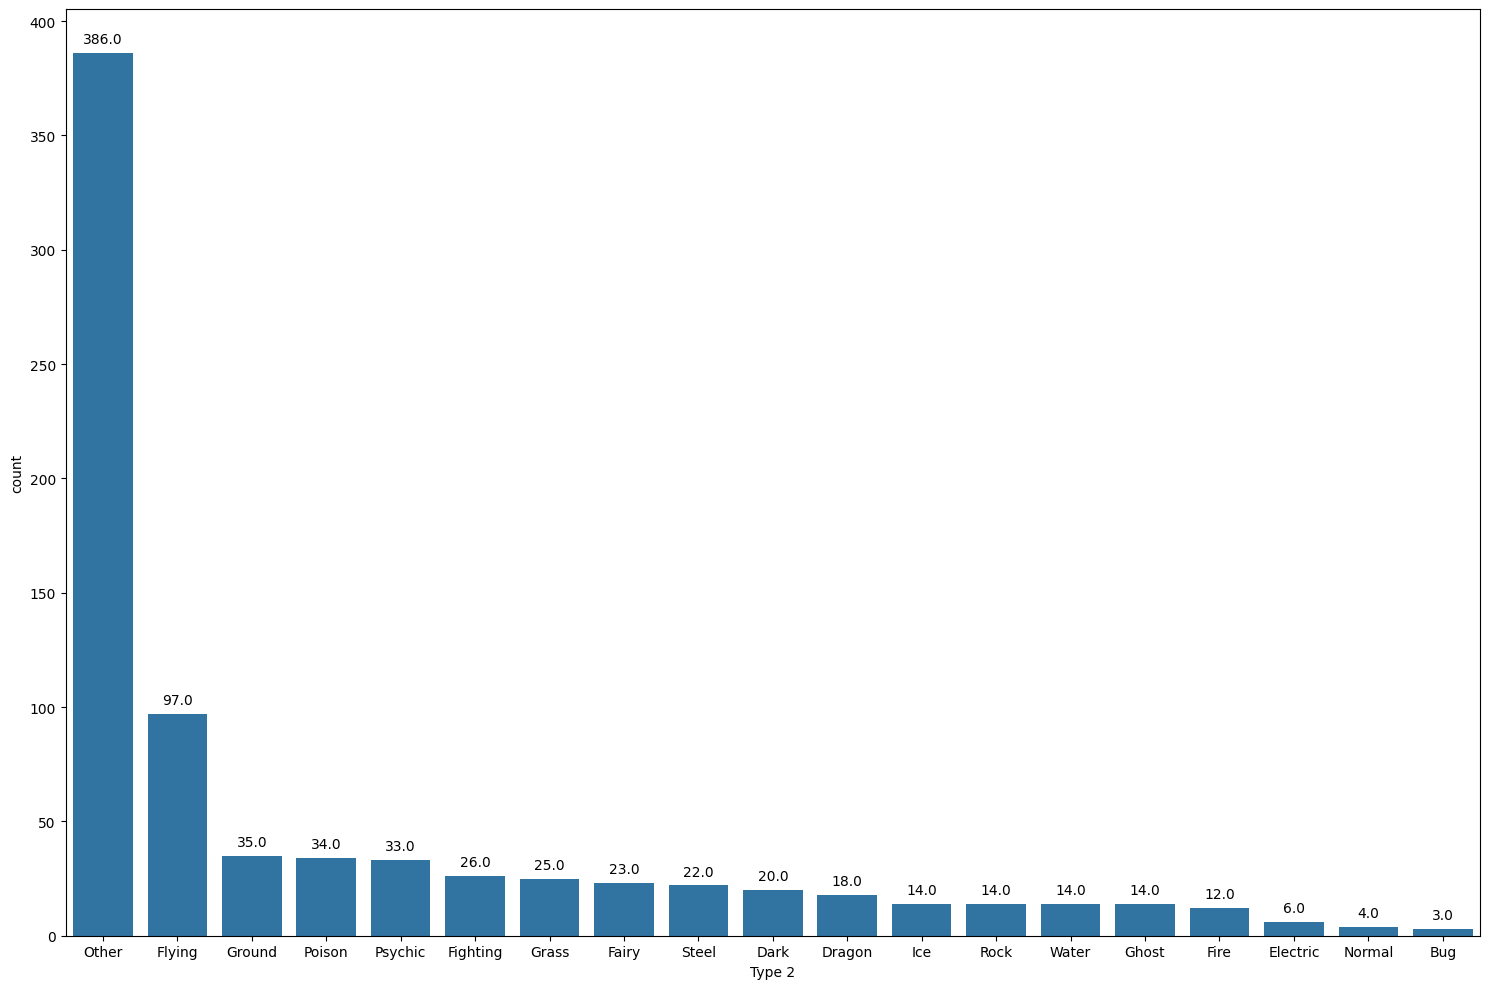

In [11]:
plt.figure(figsize=(15, 10))
t2=sns.countplot(x='Type 2', data=df, order=df['Type 2'].value_counts().index)
for p in t2.patches:
    t2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Data Analysis and Visualization

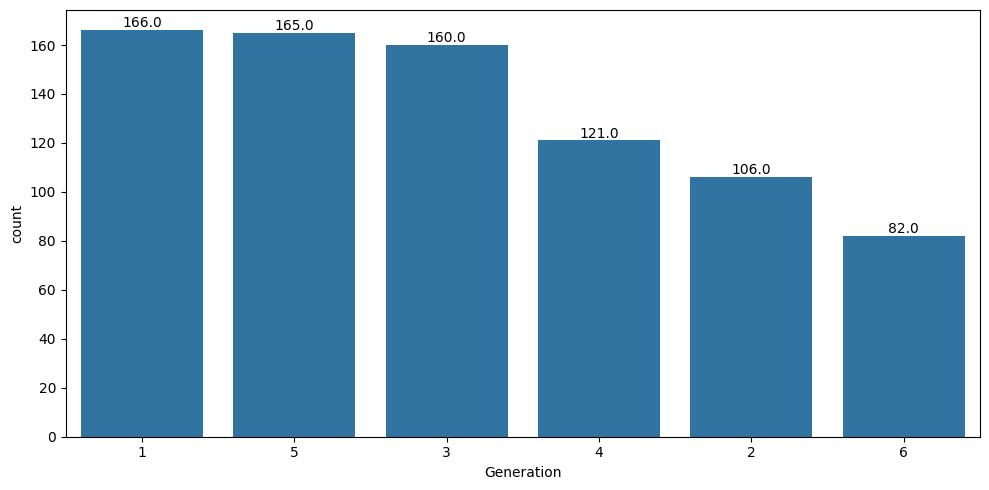

In [13]:
# Count plot for 'Generation'
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Generation', data=df, order=df['Generation'].value_counts().index )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

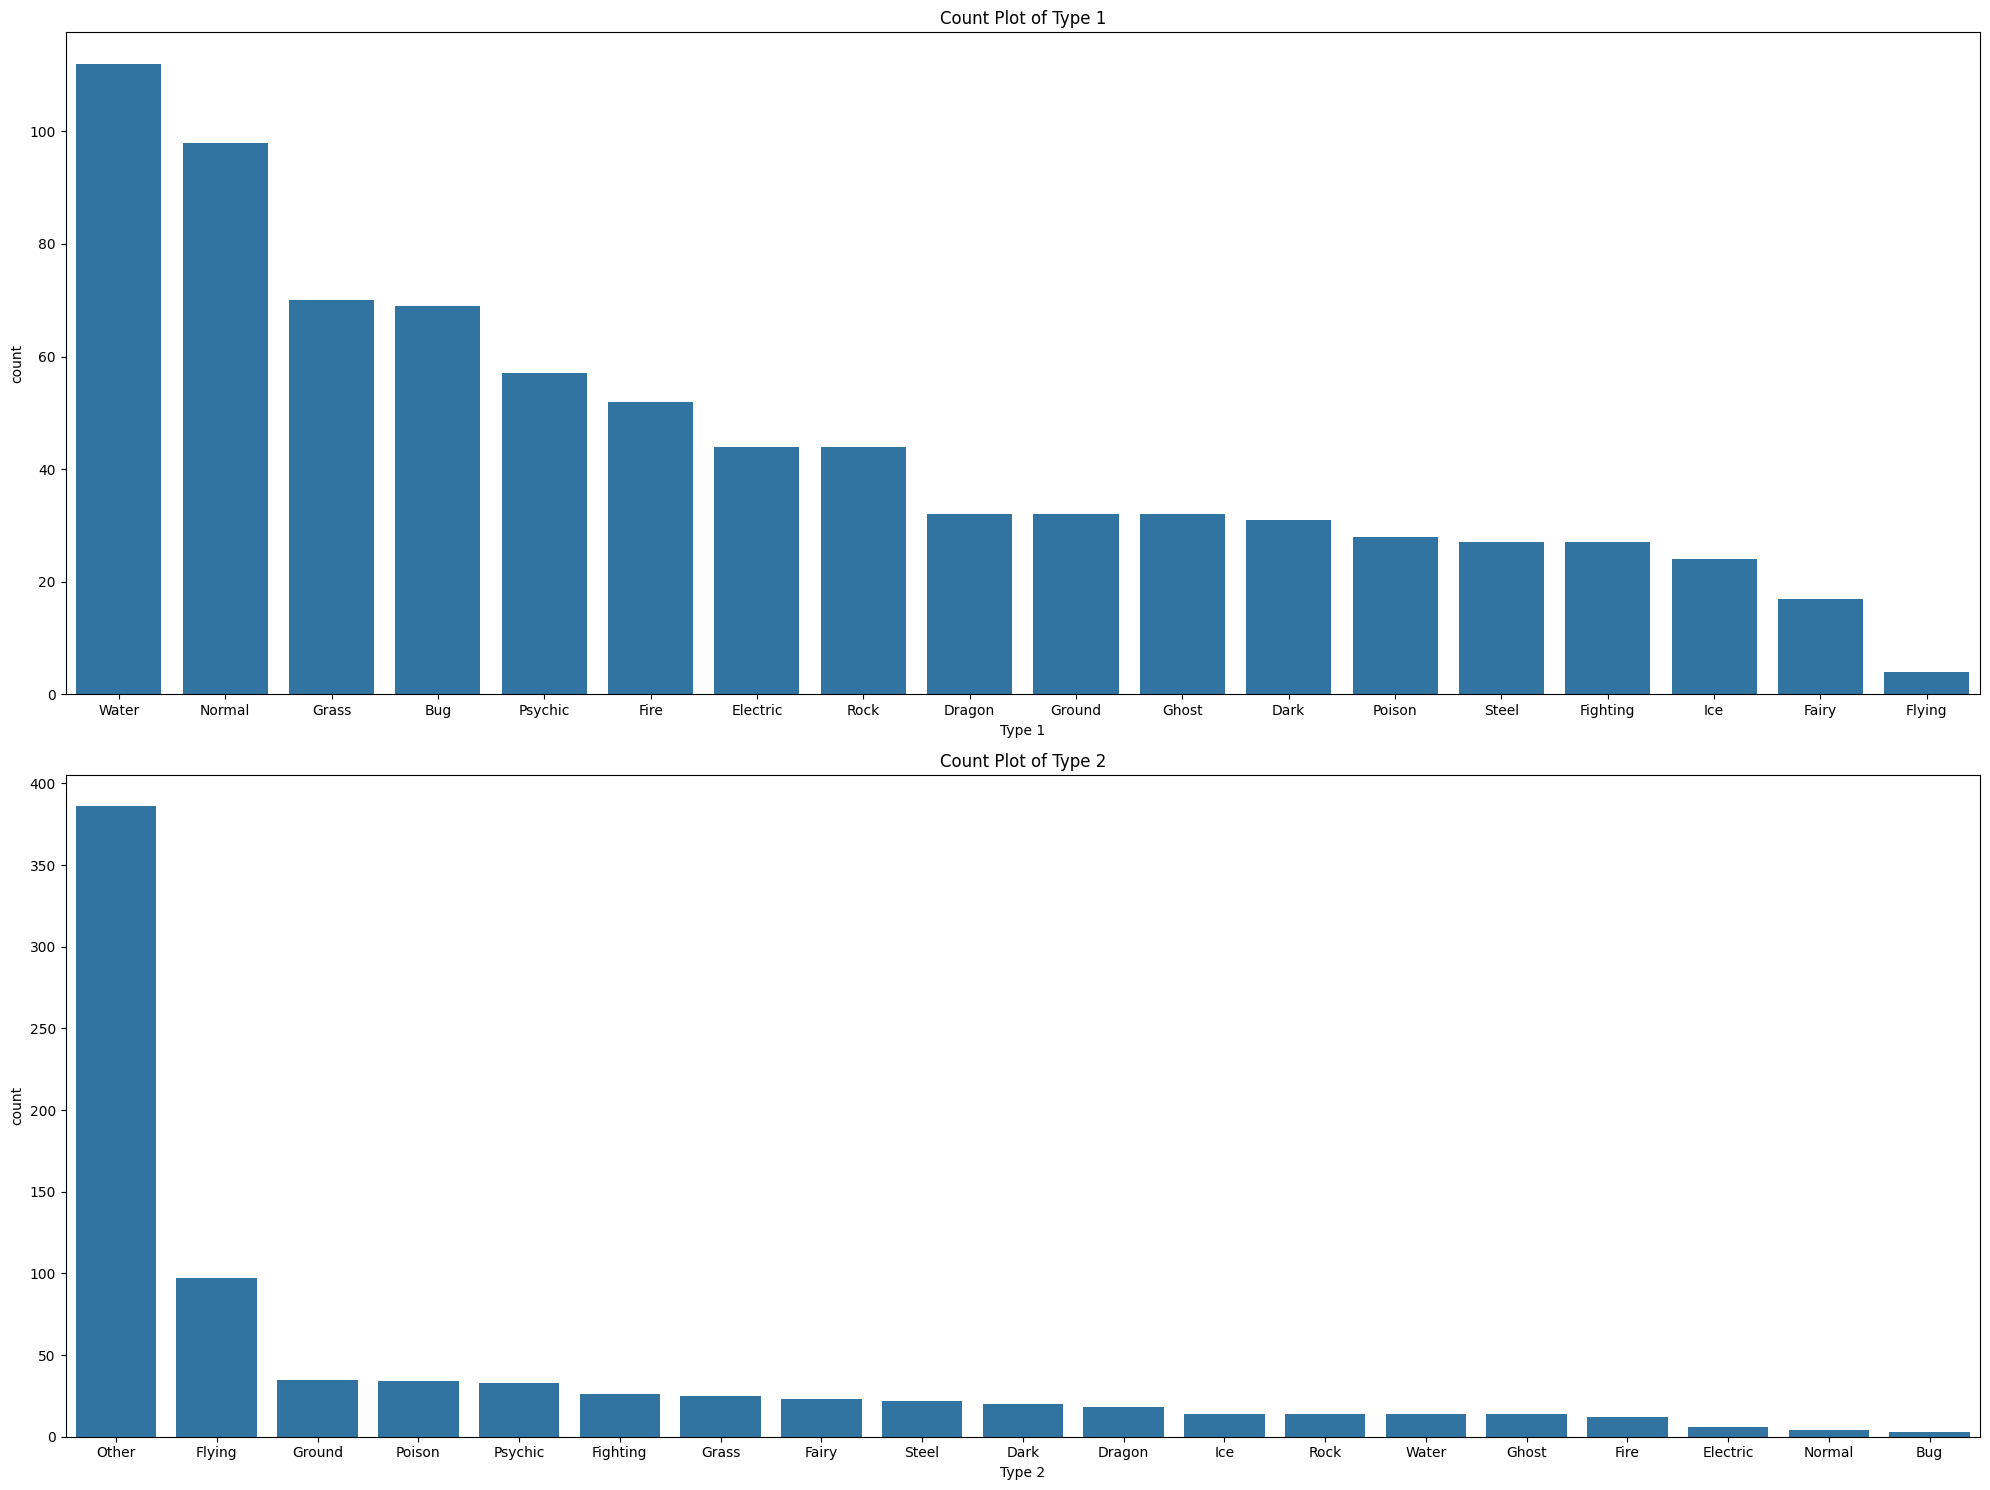

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))

# Count plot for 'Type 1'
t1 = sns.countplot(x='Type 1', data=df, ax=axes[0], order=df['Type 1'].value_counts().index)
for p in t1.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[0].set_title('Count Plot of Type 1')

# Count plot for 'Type 2'
t2=sns.countplot(x='Type 2', data=df, ax=axes[1], order=df['Type 2'].value_counts().index)
for p in t2.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[1].set_title('Count Plot of Type 2')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Find Pokemon with the lowest attack
df[df['Legendary'] == True].sort_values(by='Attack', ascending=True).head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
415,378,Regice,Ice,Other,580,80,50,100,100,200,50,3,True
430,386,DeoxysDefense Forme,Psychic,Other,600,50,70,160,70,160,90,3,True
537,480,Uxie,Psychic,Other,580,75,75,130,75,130,95,4,True
416,379,Registeel,Steel,Other,580,80,75,150,75,150,50,3,True
264,245,Suicune,Water,Other,580,100,75,115,90,115,85,2,True


In [16]:
# Find Pokemon with the highest attack
df[df['Legendary'] == True].sort_values(by='Attack', ascending=False).head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
429,386,DeoxysAttack Forme,Psychic,Other,600,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True


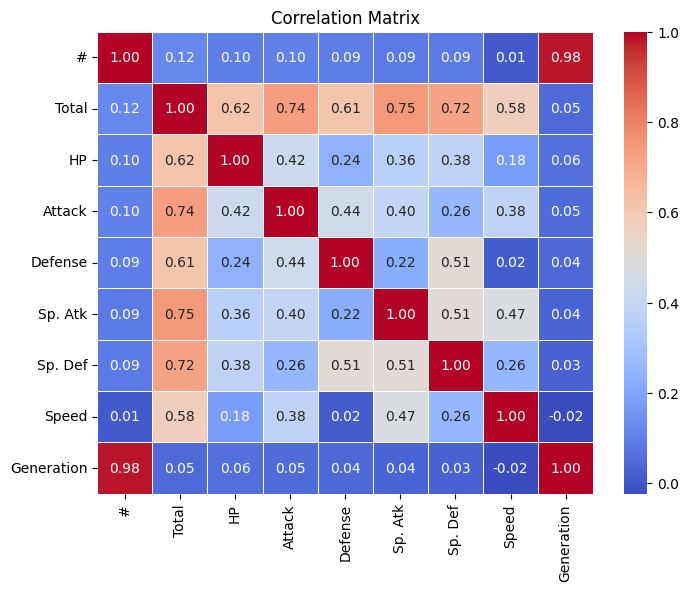

In [17]:
# Calculate correlation in integers feature
integer_columns = df.select_dtypes(include='int')

correlation_matrix = integer_columns.corr()

# Create heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

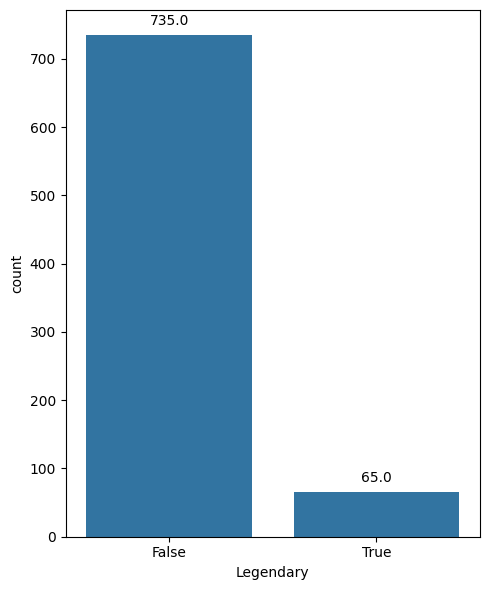

In [18]:
# Count plot for 'Type 2'
plt.figure(figsize=(5, 6))
ax = sns.countplot(x='Legendary', data=df, order=df['Legendary'].value_counts().index )
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

# One hot encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
cols = ['Type 1', 'Type 2']

# Create a dictionary to store the mapping
label_mapping = {}

# Apply label encoding and store the mapping
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_mapping[col] = dict(zip(le.classes_,
                        le.transform(le.classes_)))

# Display the transformation mapping
for col, mapping in label_mapping.items():
    print(f"{col} Label Mapping: \n {mapping}")

Type 1 Label Mapping: 
 {'Bug': 0, 'Dark': 1, 'Dragon': 2, 'Electric': 3, 'Fairy': 4, 'Fighting': 5, 'Fire': 6, 'Flying': 7, 'Ghost': 8, 'Grass': 9, 'Ground': 10, 'Ice': 11, 'Normal': 12, 'Poison': 13, 'Psychic': 14, 'Rock': 15, 'Steel': 16, 'Water': 17}
Type 2 Label Mapping: 
 {'Bug': 0, 'Dark': 1, 'Dragon': 2, 'Electric': 3, 'Fairy': 4, 'Fighting': 5, 'Fire': 6, 'Flying': 7, 'Ghost': 8, 'Grass': 9, 'Ground': 10, 'Ice': 11, 'Normal': 12, 'Other': 13, 'Poison': 14, 'Psychic': 15, 'Rock': 16, 'Steel': 17, 'Water': 18}


# Prediction

In [20]:
# Define the X and Y
x = df.drop(columns=['#', 'Name', 'Legendary'], axis=1)
y = df['Legendary']

In [21]:
x

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,9,14,318,45,49,49,65,65,45,1
1,9,14,405,60,62,63,80,80,60,1
2,9,14,525,80,82,83,100,100,80,1
3,9,14,625,80,100,123,122,120,80,1
4,6,13,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...
795,15,4,600,50,100,150,100,150,50,6
796,15,4,700,50,160,110,160,110,110,6
797,14,8,600,80,110,60,150,130,70,6
798,14,1,680,80,160,60,170,130,80,6


In [22]:
# Transform the data use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.529412,0.777778,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0
1,0.529412,0.777778,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0
2,0.529412,0.777778,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0.0
3,0.529412,0.777778,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0.0
4,0.352941,0.722222,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0.0


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def kknModel_n_graph(x, y, neighbor_range):
    # Splitting the Data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    train_scores = []
    test_scores = []

    best_neighbor = None
    best_test_score = 0


    for n_neighbors in neighbor_range:
        # Initialize the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

        # Training a model with training data
        knn_model.fit(x_train, y_train)

        # Get scores from training data and test data
        train_score = knn_model.score(x_train, y_train)
        test_score = knn_model.score(x_test, y_test)

        # Stores the n_neighbors value that gave the highest score
        if test_score > best_test_score:
            best_test_score = test_score
            best_neighbor = n_neighbors

        # Keeps score for the plot
        train_scores.append(train_score)
        test_scores.append(test_score)

    #Plotting graphs
    plt.figure(figsize=(8, 4))
    plt.plot(neighbor_range, train_scores, marker='o', label='Train Score')
    plt.plot(neighbor_range, test_scores, marker='o', label='Test Score')
    plt.title('Train and Test Scores vs. Number of Neighbors')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Displays results
    print(f"Best Test Score: {best_test_score:.4f} with n_neighbors={best_neighbor}")
    return best_neighbor


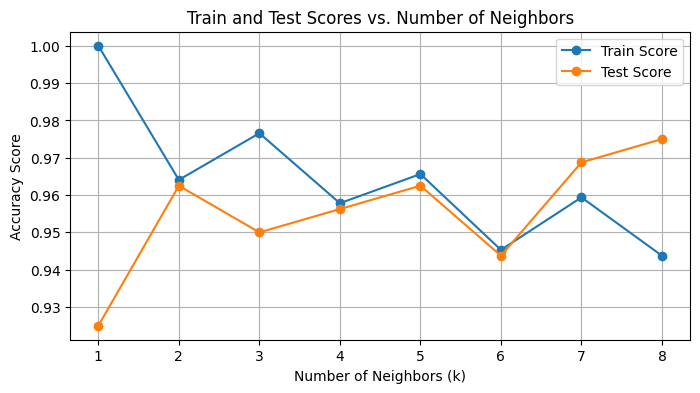

Best Test Score: 0.9750 with n_neighbors=8


8

In [24]:
# function call with neighbor value range from 1 to 9
neighbor_range = range(1, 9)
kknModel_n_graph(x, y, neighbor_range)

In [25]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


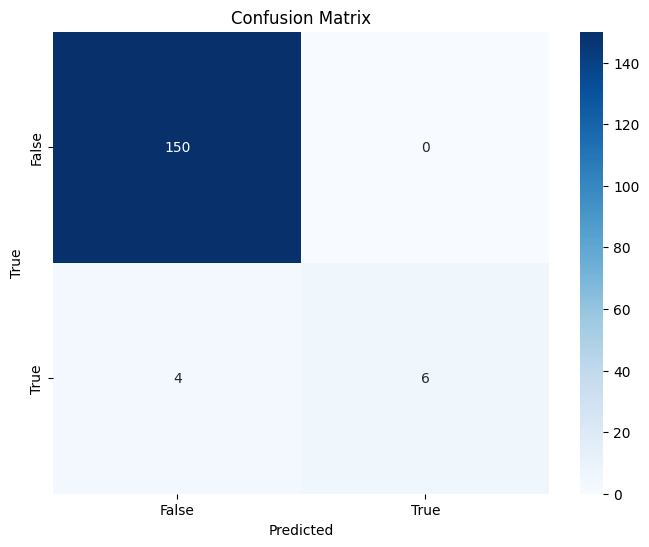

In [27]:
# Function call with best_neighbor
knn_model = KNeighborsClassifier(n_neighbors=8)

# Divide data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model with training data
knn_model.fit(x_train, y_train)

# Make predictions on test data
y_pred = knn_model.predict(x_test)

# Display and plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=np.unique(y))
